# Seven-qubit Quantum Fourier Transform 


<iframe width="100%" height="450" src="https://www.youtube.com/embed/93-zLTppFZw?si=whJzB_FrpuorerTv" title="Hello World" frameborder="0" allow="accelerometer; clipboard-write; encrypted-media; gyroscope; picture-in-picture" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen />


Musawwadah Mukhtar PhD  
https://github.com/DrMukhtar  

This is an implementation of a well known quantum algorithm, quantum Fourier transform. This is the first example of my personal project *petitZooQ*, my humble collection of implemented quantum algorithms.  

Quantum Fourier transform (QFT) is one of essential building block of many other quantum algorithm, including the Shor algorithm known for efficient number factorization. It is a powerful algorithm because the performance scale as $O((log N)^2)$, exponential speed-up compared to $N log N$ of Fast Fourier transform; here the number of qubit required is $log N$.  

To my knowledge, factorizing number would require QFT with 8 qubits in the first register; with the second register, this requires 12 qubits in total. This has motivated me to test QFT with 3 qubits up 7 qubits using the available IBM quantum processors. For each case, I compare the output of the quantum processor with the simulation result and the analytical result. The Qiskit package used to run the quantum processor includes simulation. Besides, we can also derive the analytical result. However, it would be impractical to simulate more than 15 qubits using your laptop. I found the case of seven qubits is the limit of their technology; tested on October 2024.  

The notebook requires 7 seconds of QPU time, small compared to 10 minutes of monthly quota.  

To give a positive outlook, I believe the quantum processor performance will improve. Hopefully, the provided notebook in this project would help you aware of the state of the art of quantum computing.     

Here, you'll find the jupyter notebook. It's self-contained.    
However, to be able to reproduce the result, you have to install qiskit and have an account to access the IBM quantum processors. Indeed you have to get a token available in you account dashboard.   

To install Qiskit:  
https://docs.quantum.ibm.com/guides/install-qiskit

With your token, you should be able to run the notebook.  
I would like to point out the prompt to launch the notebook  
`
jupyter notebook path/to/notebook/7qubit_QFT.ipynb
`

I'll try to respond if you have any difficulty to reproduce the result.  

## Importing

In [1]:
# Built-in modules
import math

# Imports from Qiskit
from qiskit import QuantumCircuit

In [2]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# Construct the Estimator instance.
from qiskit_ibm_runtime import EstimatorV2 as Estimator

## Access to IBM hardware
The following is the code to access the QPU hardware. Don't forget to enter the token of your account.

In [ ]:
# Imports from Qiskit Runtime
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(channel="ibm_quantum", token="enter_your_token_here")

backend = service.least_busy(simulator=False, operational=True)
backend.name

## The Circuit

In a quantum program, *quantum circuits* constitute the instructions and *operators* represent the observables to be measured.  
Ref:  
[`QuantumCircuit`](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit#quantumcircuit-class) for all available operations.



### Initializations

In [4]:
# Create a new circuit with seven qubits
qc = QuantumCircuit(7)

### Input test
Here, I provided the possibility of initial qubit states other than the all-zero state.

In [5]:
# Encoding your input
qInput = [0, 1, 0, 1, 0, 0, 1]

if qInput[0] == 1:
    qc.x(0)
if qInput[1] == 1:
    qc.x(1)
if qInput[2] == 1:
    qc.x(2)
if qInput[3] == 1:
    qc.x(3)
if qInput[4] == 1:
    qc.x(4)
if qInput[5] == 1:
    qc.x(5)
if qInput[6] == 1:
    qc.x(6)

### The QFT circuit
**This is the heart of this notebook!**  
We can see that the number of lines grows quadratically with the number of qubits.

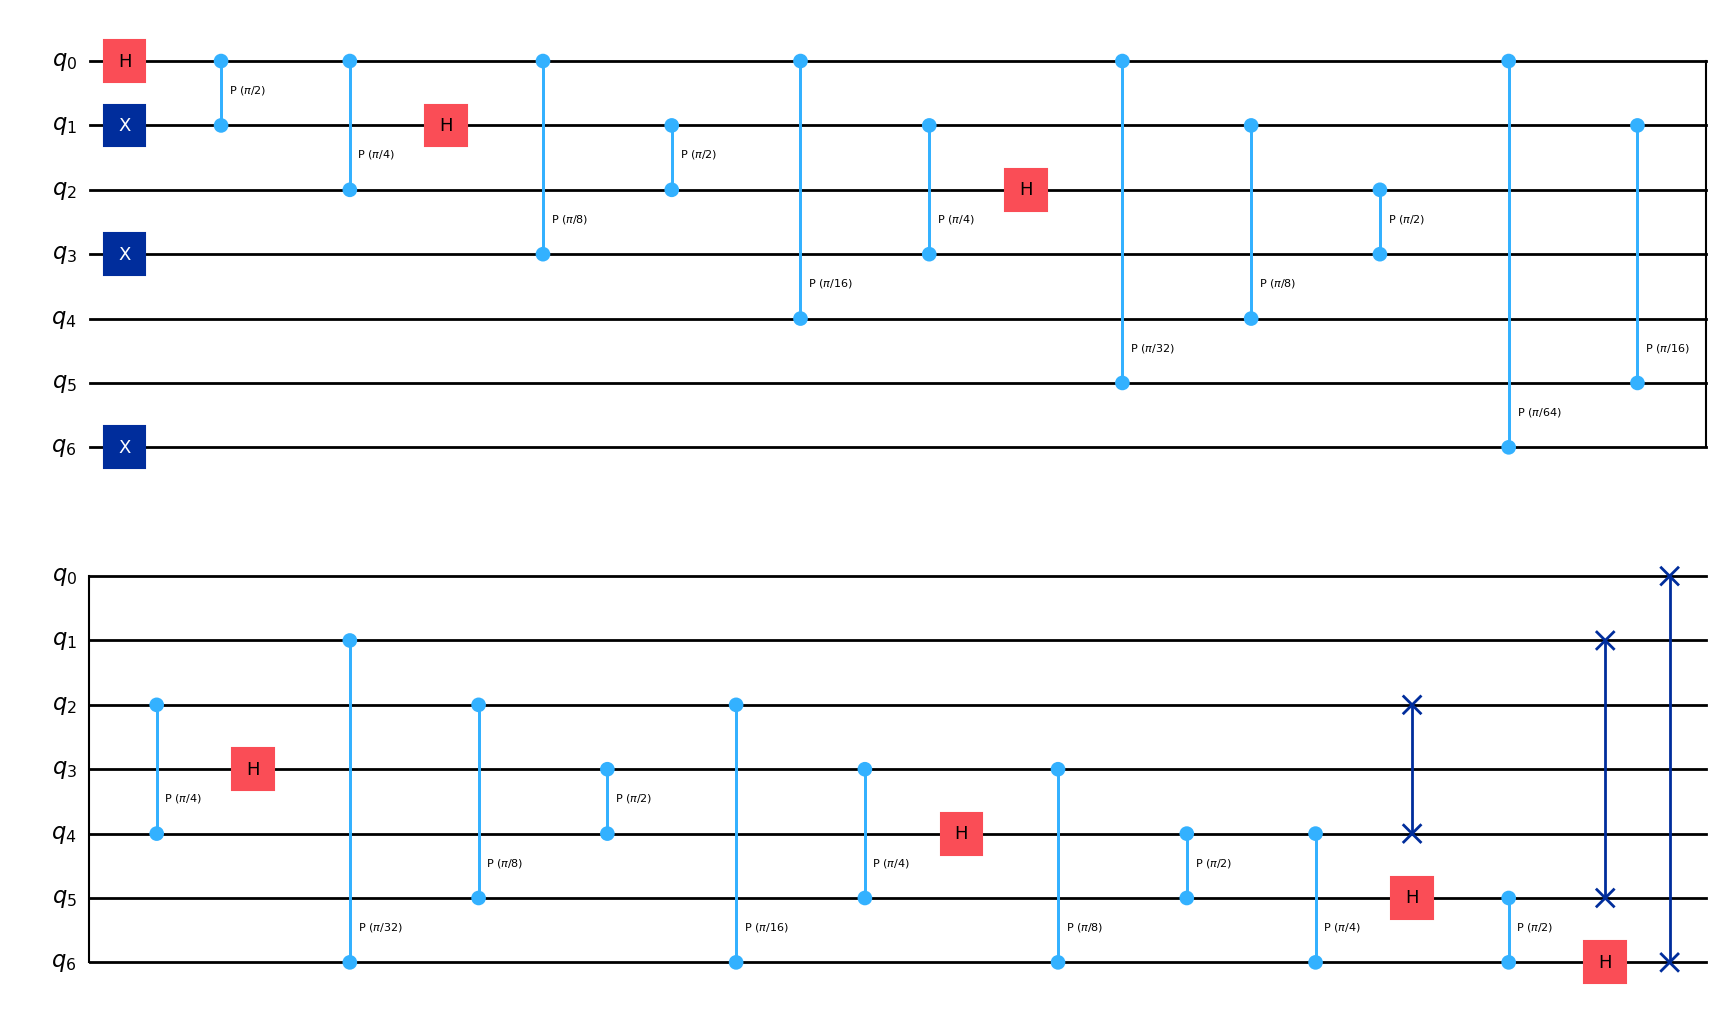

In [6]:
# 7-qubit QFT circuit
qc.h(0)
qc.cp(math.pi/2,0,1)
qc.cp(math.pi/4,0,2)
qc.cp(math.pi/8,0,3)
qc.cp(math.pi/16,0,4)
qc.cp(math.pi/32,0,5)
qc.cp(math.pi/64,0,6)
qc.h(1)
qc.cp(math.pi/2,1,2)
qc.cp(math.pi/4,1,3)
qc.cp(math.pi/8,1,4)
qc.cp(math.pi/16,1,5)
qc.cp(math.pi/32,1,6)
qc.h(2)
qc.cp(math.pi/2,2,3)
qc.cp(math.pi/4,2,4)
qc.cp(math.pi/8,2,5)
qc.cp(math.pi/16,2,6)
qc.h(3)
qc.cp(math.pi/2,3,4)
qc.cp(math.pi/4,3,5)
qc.cp(math.pi/8,3,6)
qc.h(4)
qc.cp(math.pi/2,4,5)
qc.cp(math.pi/4,4,6)
qc.h(5)
qc.cp(math.pi/2,5,6)
qc.h(6)
qc.swap(0,6)
qc.swap(1,5)
qc.swap(2,4)

# Visualizing the 7-qubit circuit
qc.draw("mpl")

### Observables
Here, `IIIIIIZ` operator is a shorthand for the tensor product $Z\otimes I \otimes I \otimes I \otimes I \otimes I \otimes I$, which means measuring Z on qubit 1 and nothing on other qubit, similarly with X.  
Somehow the order is reversed.  
One interesting about Quantum Fourier Transform, the final state is not an entangled state despite numerous entangling gates. 


In [7]:
from qiskit.quantum_info import SparsePauliOp

observables_labels = ["IIIIIIZ", "IIIIIIX", "IIIIIIY",
                        "IIIIIZI", "IIIIIXI", "IIIIIYI",
                        "IIIIZII", "IIIIXII","IIIIYII",
                        "IIIZIII","IIIXIII","IIIYIII",
                        "IIZIIII","IIXIIII","IIYIIII",
                      "IZIIIII","IXIIIII","IYIIIII",
                     "ZIIIIII","XIIIIII","YIIIIII"]
observables = [SparsePauliOp(label) for label in observables_labels]

## Job Execution
Execution on quantum processor unit involves optimization of the set of instructions associated with the circuit.  
According to IBM Quantum, optimization minimizes the overal depth (roughly the number of instructions) of the circuit.

When accessing the hardware, we set the backed device represented by `backend`. In addition we have the complete circuit, `qc`, and the output measurements, `observables`. From these three parameters, we define the pass manager `pm`, then the `isa_circuit`, then the `estimator`, `mapped_observables`, and most importantly `job`.  

The pass manager `pm` is related to the connection with `backend`.  

The `isa_circuit` is related to the optimization of the circuit. It requires specialised knowledge specific to the superconducting qubit architecture of the quantum processor.  

The `estimator` is related to how frequencies of the measurements to provided the statistics of the result. In short, more measurement shots take more QPU time!  

The `mapped_observables` is related to the effective measurement operators to adapt the circuit optimization.  

Lastly, the `job` is your sent request to the quantum hardware.

### Optimization


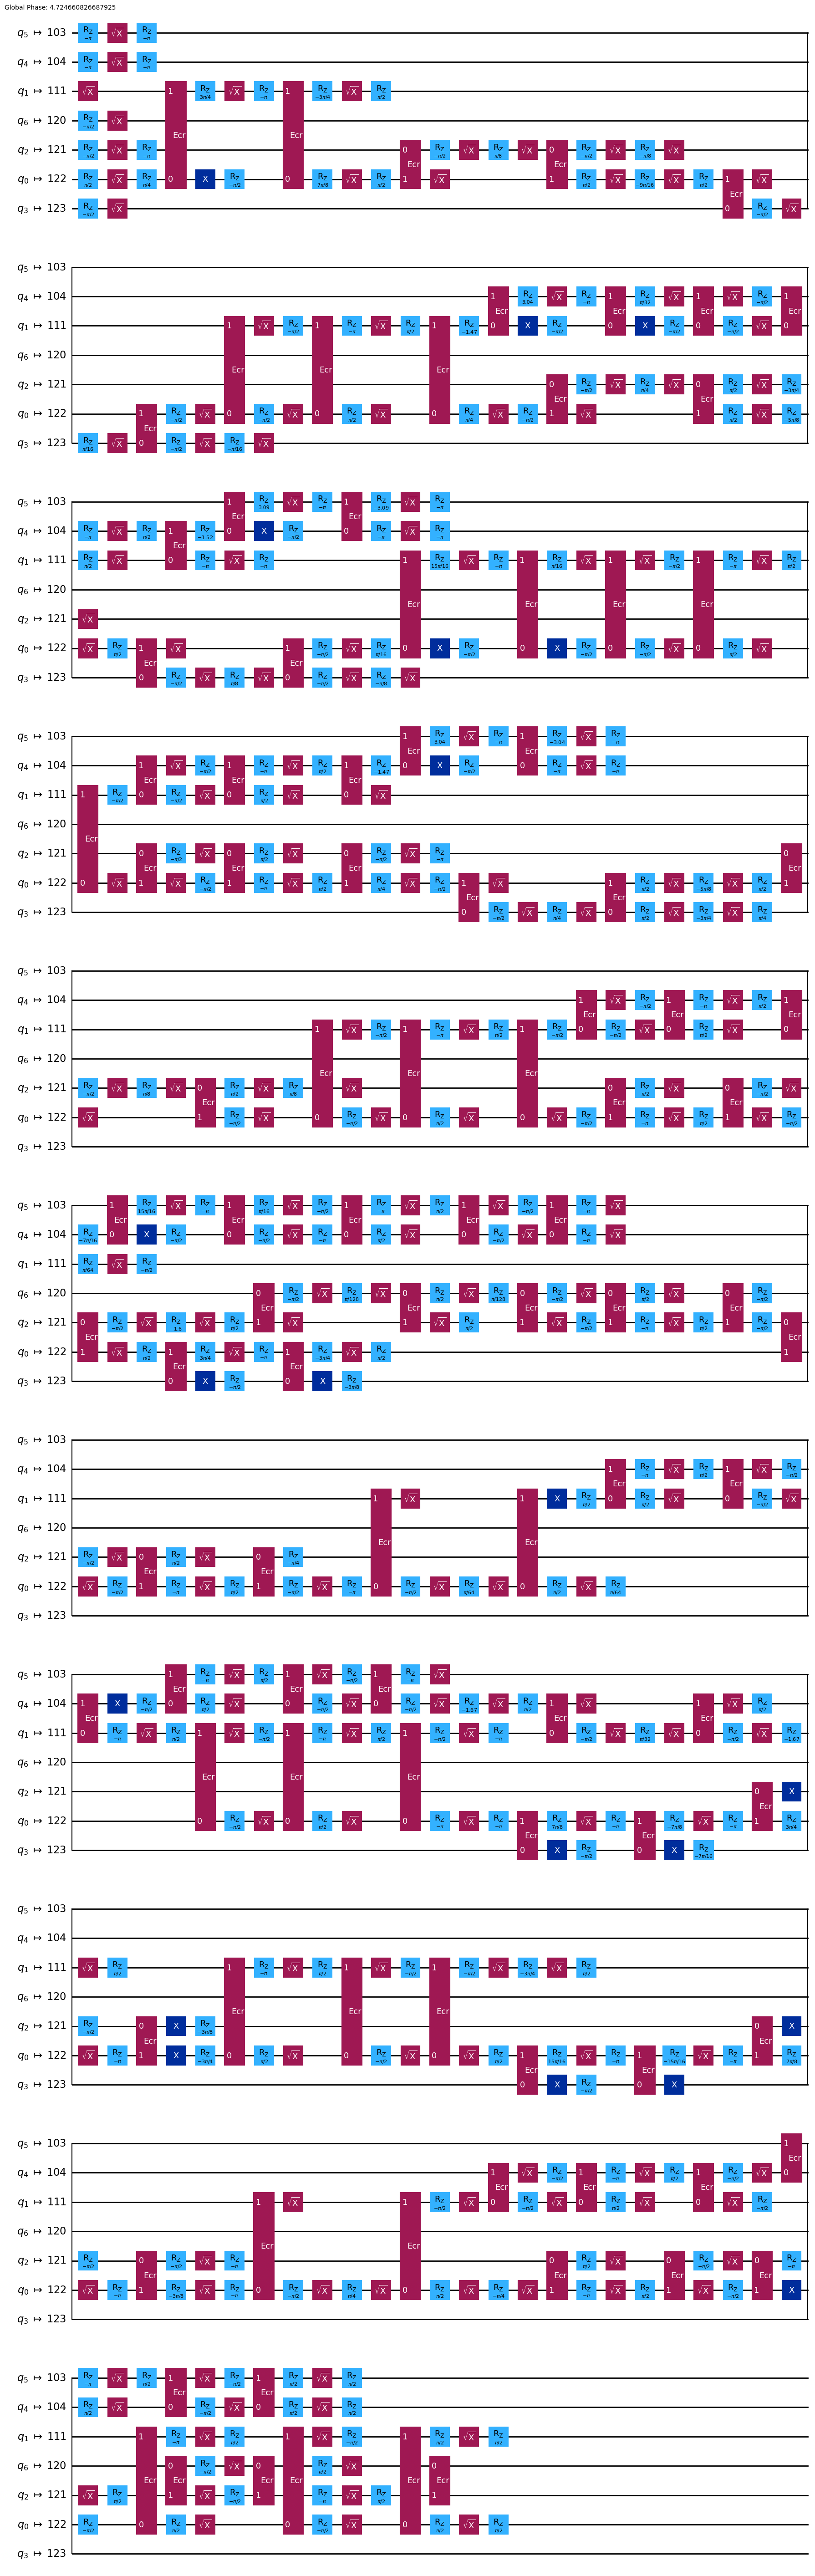

In [8]:
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)

# Convert to an ISA circuit and layout-mapped observables.
isa_circuit = pm.run(qc)
isa_circuit.draw('mpl', idle_wires=False)

### Parameters of Estimator
In short, Estimator instance defines the number of set of measurement shots. `estimator.options.default_shots = 5000` means the final result is obtained from averaging 5000 sets of measurements.   

In [9]:
estimator = Estimator(mode=backend)
estimator.options.resilience_level = 1
estimator.options.default_shots = 5000

### Sending job
`job` confirms the sending of the request of execution of the quantum circuit. Expect some queue as indicated in your account dashboard as you're not the only one using the quantum processors. 

In [10]:
mapped_observables = [
    observable.apply_layout(isa_circuit.layout) for observable in observables
]

job = estimator.run([(isa_circuit, mapped_observables)])

# Use the job ID to retrieve your job data later
print(f">>> Job ID: {job.job_id()}")

>>> Job ID: cwpcr2gehebg008hq350


Check ibm dashboard to monitor the queue!

### Result
 Once the the hardware returns the result...

In [11]:
job_result = job.result()

pub_result = job.result()[0]

## Simulator
If you want to simulate the quantum circuit on your computer, you should modify the `backend`, and consequently the `estimator` instance, the pass manager `pm`, the `isa_circuit`, the `mapped_observables`, and the `job`.  
This is good way of learning but your computer can only simulate limited number of qubit. Simulation of 7 qubits can still be easily done using laptop.

In [12]:
from qiskit_ibm_runtime.fake_provider import FakeAlmadenV2
backendSim = FakeAlmadenV2()

estimatorSim = Estimator(backendSim)

pmSim = generate_preset_pass_manager(backend=backendSim, optimization_level=1)

isa_circuitSim = pmSim.run(qc)

mapped_observablesSim = [
      observable.apply_layout(isa_circuitSim.layout) for observable in observables
]

jobSim = estimatorSim.run([(isa_circuitSim, mapped_observablesSim)])

/Users/musawwadahmukhtar/Learning/my-q-venv/lib/python3.12/site-packages/qiskit_ibm_runtime/fake_provider/fake_backend.py:374: RuntimeWarning: Aer not found, using qiskit.BasicSimulator and no noise.
  warnings.warn(


In [13]:
resultSim = jobSim.result()
job_resultSim = jobSim.result()
pub_resultSim = jobSim.result()[0]

## Result Analyses

### Analytical solutions
The analytical solution can be find in quantum information textbooks. I hope this is explicit enough so you can remark the pattern in the expression.

In [14]:
import numpy as np

qInput = np.array(qInput)
cQ = np.array([1, 1/2, 1/4, 1/8, 1/16, 1/32, 1/64])

analytics = np.array([0, math.cos(math.pi*np.dot(cQ[:1],qInput[6:])), math.sin(math.pi*np.dot(cQ[:1],qInput[6:])), 
                      0, math.cos(math.pi*np.dot(cQ[:2],qInput[5:])), math.sin(math.pi*np.dot(cQ[:2],qInput[5:])),
                      0, math.cos(math.pi*np.dot(cQ[:3],qInput[4:])), math.sin(math.pi*np.dot(cQ[:3],qInput[4:])),
                      0, math.cos(math.pi*np.dot(cQ[:4],qInput[3:])), math.sin(math.pi*np.dot(cQ[:4],qInput[3:])),
                      0, math.cos(math.pi*np.dot(cQ[:5],qInput[2:])), math.sin(math.pi*np.dot(cQ[:5],qInput[2:])),
                      0, math.cos(math.pi*np.dot(cQ[:6],qInput[1:])), math.sin(math.pi*np.dot(cQ[:6],qInput[1:])), 
                      0, math.cos(math.pi*np.dot(cQ,qInput)), math.sin(math.pi*np.dot(cQ,qInput))])

### Plotting the results

In [15]:
assert len(pub_result.data.evs) == 21

values = pub_result.data.evs
errors = pub_result.data.stds

In [16]:
valuesSim = pub_resultSim.data.evs
errorsSim = pub_resultSim.data.stds

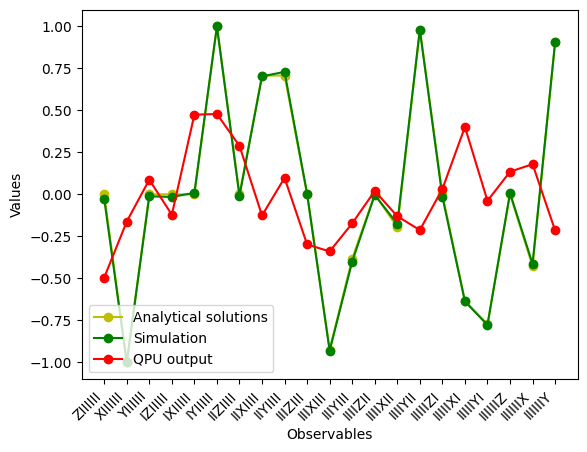

In [17]:
# Plot the result
from matplotlib import pyplot as plt

# actual observables labels
actual_observables_labels = np.array([e[::-1] for e in observables_labels])

# plotting graph
plt.plot(actual_observables_labels, analytics, '-oy',label='Analytical solutions')
plt.plot(actual_observables_labels, valuesSim, '-og',label='Simulation')
plt.plot(actual_observables_labels, values, '-or',label='QPU output')
plt.legend()
plt.xlabel('Observables')
plt.ylabel('Values')
plt.xticks(rotation=45, ha='right')
plt.show()

The simulation results are always close to the analytical solutions.  

For the case of seven qubits, the QPU output shows huge discrepancies.
If you tried a simpler case, with three qubits for instance, the discrepancies are much smaller. I left it as an exercise.  

Besides, I will presented in separated notebook my attempt of QFT with three qubits with more analyses.  

### Exporting the results
I am happy to receive the csv file and maybe we can learn something from the accumulated data!

In [18]:
import pandas as pd

data = [analytics,valuesSim, values]

test=pd.DataFrame(data).T
test.columns=['Theo','Sim','QPU']
test.index=actual_observables_labels

filename='7-qubit_QFT_'+''.join(map(str,qInput))+'_'+job.job_id()+'.csv'
test.to_csv(filename)